#### DATA SCIENCE COMPETITION 2020 :: Texas A&M University :: Flight Data Visualization

### The Culprits of flight delays - What causes flight delays?
####Team: **AeroNet**
####Members: **SangHyeon Lee**, **Ming-Hsien Chien**,**Yusu Wang**, **Hung-Yi Chen**, **Bo Wang**.

### Sponsor: 
Institute of Data Science – Texas A&M University

### Challenge: 
Build models for predicting expected flight delays by airline and flight for the third quarter of 2019.

### Data: 
Historical data from the Bureau of Transportation Statistics for 2018 and the first half of 2019.  The data files, are CSV files containing records for almost 11 million flights in 2018 and 2019.  The data dictionary is in an excel file FlightDataDescription.xlsx.

### Data Files:
* **FlightDelays.csv**: 10,915,495 flight logs for 2018 and the first half of 2019 (to Q2)
* **Airports.csv**: Airport locations and codes for 362 passenger airports in the United States
* **Routes.csv**: Distance for 6,684 airport routes with origins and destinations in the U.S.
* **Airfares.csv**: The average airfares between cities for 2018 and the first half of 2019.

<br>After removing the flights that were cancelled, we can see all the features in the raw data.


In [1]:
import pandas as pd
import numpy as np
import csv
flight_data = pd.read_csv("drive/My Drive/FlightDelays.csv", sep=',')
flight_data.drop(flight_data[flight_data.CANCELED == 1].index, inplace=True)
flight_data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,CARRIER,FL_NUM,Route,ORIGIN,DEST,DEST_CITY,DEST_STATE,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,PASSENGERS,EMPFULL,EMPPART,EMPTOTAL,EMPFTE,NET_INCOME,OP_REVENUES
0,2018,1,1,1,1,2018-01-01,9E,3331,42,ABY,ATL,"Atlanta, GA",GA,700,656.0,-4.0,0.0,0.0,-1.0,0700-0759,11.0,707.0,745.0,6.0,803,751.0,-12.0,0.0,0.0,-1.0,0800-0859,0,NaN,0,63.0,55.0,38.0,145,NaN,NaN,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25
1,2018,1,1,1,1,2018-01-01,9E,3940,42,ABY,ATL,"Atlanta, GA",GA,1511,1510.0,-1.0,0.0,0.0,-1.0,1500-1559,11.0,1521.0,1558.0,6.0,1616,1604.0,-12.0,0.0,0.0,-1.0,1600-1659,0,NaN,0,65.0,54.0,37.0,145,NaN,NaN,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25
2,2018,1,1,2,2,2018-01-02,9E,3409,42,ABY,ATL,"Atlanta, GA",GA,625,620.0,-5.0,0.0,0.0,-1.0,0600-0659,13.0,633.0,711.0,9.0,726,720.0,-6.0,0.0,0.0,-1.0,0700-0759,0,NaN,0,61.0,60.0,38.0,145,NaN,NaN,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25
3,2018,1,1,2,2,2018-01-02,9E,3940,42,ABY,ATL,"Atlanta, GA",GA,1511,1507.0,-4.0,0.0,0.0,-1.0,1500-1559,11.0,1518.0,1552.0,6.0,1616,1558.0,-18.0,0.0,0.0,-2.0,1600-1659,0,NaN,0,65.0,51.0,34.0,145,NaN,NaN,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25
4,2018,1,1,3,3,2018-01-03,9E,3353,42,ABY,ATL,"Atlanta, GA",GA,630,631.0,1.0,1.0,0.0,0.0,0600-0659,11.0,642.0,715.0,11.0,729,726.0,-3.0,0.0,0.0,-1.0,0700-0759,0,NaN,0,59.0,55.0,33.0,145,NaN,NaN,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25


# Abstract - Data Visualization on FLight Data

The first step in every Data Science and Prediction problem is to visualize the data. Also, at the final step of some researches, i.e submitting papers, researchers usually explain their ideas with the aid of data visualization, because human's vision may have a better acceptance to figures than words or equations. Data Visualization provides us some concepts or picture to the prediction problem and results.

<br>The intuition here is that we plot the relationships between each feature to the arrival delay, so that we expect to find some tendency between the arrival delay to the specific feature. Futrhermore, we also find that if the arrival delays are more diversified with respect to one feature in different values, in other words, the arrival delays show more  randomness to this specific feature, we can suggest this feature to be a great indicator for our prediction model for the arrival delays.

<br>We adopt **seaborn**, which is a Python library with many fantastic visualizations. Also, it is easy to get started but users could still get profound information by utilizing it.

# Analysis on the Revenue Driver to Arrival Delay - Average Fare Per Mile

The **FlightDelays.csv** contains the information to each flight, and the **Airfares.csv** has the information of Average Fare between two cities in a specific Year and Quarter.

<br>We combines these two data to acquire the **Average Fare Per Mile** (every 0.2 a group) for each flight, which is calculated by dividing the fare by the total distance between the origin and destination of a certain flight. Also, to reduce the complexity of interpreting figures, we us **Arrival Delay Intervals** as arrival delays, by splitting the arrival delay time by every 15 min from -15 to 180 minutes (group number -2~12).

<br> It has been shown that revenue has a significant impact on
scheduled on-time arrival probabilities. In other words, revenue
maximization motivation is one of the most important drivers in airline scheduling decisions and is strongly correlated to flight delays. Thus, it is reasonable to predict that the average fare per mile is a potential driver for flight delays.

In [1]:
import pandas as pd
import numpy as np
import csv

# CARRIER PASSENGERS EMPFULL EMPPART EMPTOTAL EMPFTE NET_INCOME OP_REVENUES
flight_data = pd.read_csv("drive/My Drive/FlightDelays.csv", sep=',')
flight_data.drop(flight_data[flight_data.CANCELED == 1].index, inplace=True)
flight_data = flight_data[['ORIGIN','DEST','ARR_DELAY_GROUP']]
market = pd.read_csv("drive/My Drive/AirFares.csv")
market = market.rename(columns={"Origin":"ORIGIN", "Dest":"DEST"})
newColName = ['ORIGIN', 'DEST','nsmiles', 'fare', 'large_ms']
flight_data = pd.merge(flight_data, market[newColName], on=['ORIGIN', 'DEST'])
sum_column = flight_data['fare']/flight_data['nsmiles']
flight_data['AVG_FARE_MILE'] = sum_column

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<Figure size 1440x360 with 0 Axes>

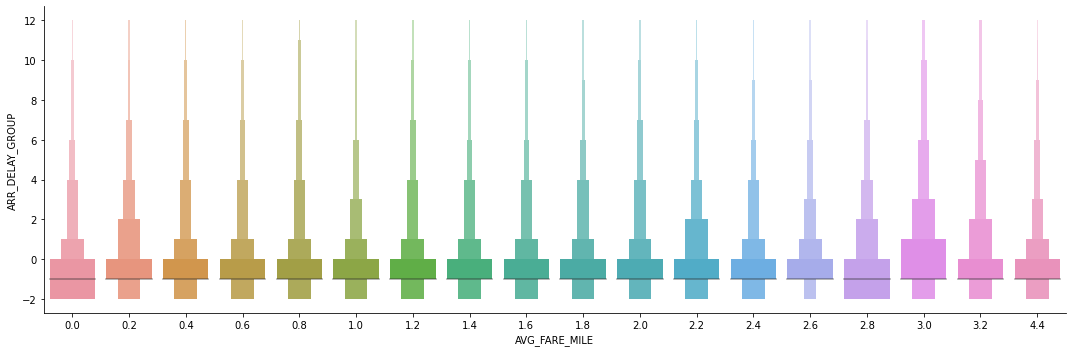

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
flight_data_time = flight_data[['AVG_FARE_MILE','ARR_DELAY_GROUP']]
flight_data_time['AVG_FARE_MILE'] = flight_data_time['AVG_FARE_MILE'].apply(lambda x: np.float64(np.floor(x*5)/5))
plt.figure(figsize=(20,5))
sns.catplot(x="AVG_FARE_MILE", y="ARR_DELAY_GROUP", aspect=3, kind='boxen', data=flight_data_time)

# Analysis on the Competitiveness to Arrival Delay - Proportion of Market Share

A hypothesis here is that the competitive measures (e.g., market share) has a significant impact on the scheduled on-time arrival probabilities. To quantifty the competitive measures, we used the proportion of market covered by carriers with **largest market share** (every 0.2 a group) to capture the competitive environment of certain routes. 

<br>We chose the proportion of market covered by the carrier with the largest market share to capture the competitive environment because the largest market share covered by a single carrier reflects the market concentration. 

<br>Typically speaking, **the higher the market share, the higher the market concentration**. Thus, the proportion of market covered by the carrier with largest market share is a good indicator of market competition of a certain route, which is also supported by the visualization results.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<Figure size 1440x360 with 0 Axes>

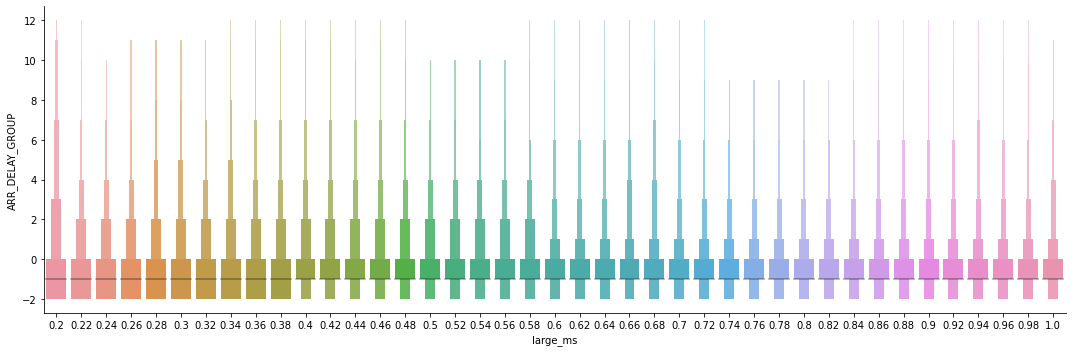

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
flight_data_time = flight_data[['large_ms','ARR_DELAY_GROUP']]
flight_data_time['large_ms'] = flight_data_time['large_ms'].apply(lambda x: np.float64(np.floor(x*50)/50))
#flight_data_time.head()
plt.figure(figsize=(20,5))
sns.catplot(x="large_ms", y="ARR_DELAY_GROUP", aspect=3, kind='boxen', data=flight_data_time)

# Analysis on the Service Quality to Arrival Delay - Proportion of Market Share

The **Full time equivalent employees (EMPFTE)** is an feature we select to plot and discuss here.

<br>The total number of full time equivalent employees can reflect the service quality of flights on
a route. If the number of full time equivalent employees cannot afford the on/off-boarding
demands, it may affect the Carrier Delay and cause the flight arrival delay finally. And the visualization results also show that at some range of the number of EMPFTE, higher arrival delays may happen.

ERROR! Session/line number was not unique in database. History logging moved to new session 61


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<Figure size 1440x360 with 0 Axes>

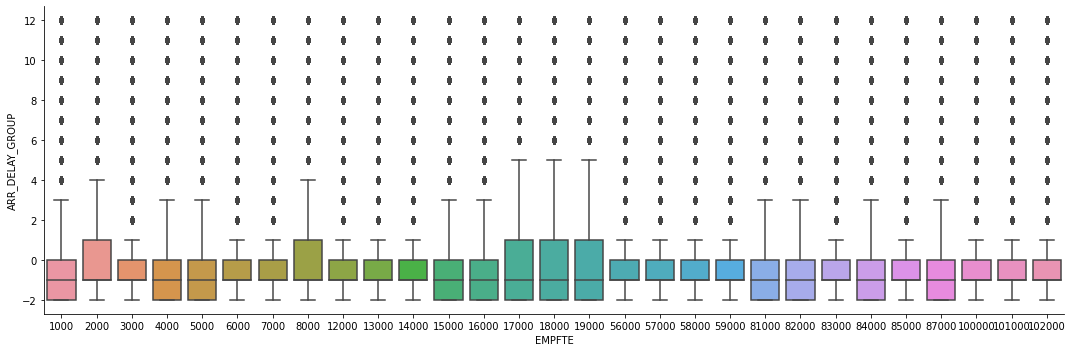

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

flight_data_time = flight_data[['EMPFTE','ARR_DELAY_GROUP']]
flight_data_time['EMPFTE'] = flight_data_time['EMPFTE'].apply(lambda x: np.int32(np.floor(x/1000)*1000))
flight_data_time['EMPFTE'] = flight_data_time['EMPFTE'].apply(lambda x: 1000 if x < 1000 else x)
plt.figure(figsize=(20,5))
sns.catplot(x="EMPFTE", y="ARR_DELAY_GROUP", aspect=3, kind='box', data=flight_data_time)

# Analysis on the CRS Departure Time to Arrival Delay - CRS Departure Time

The **CRS Departure Time**, which is a scheduled departure time for each flight, where CRS stands for computerized reservation system.

<br>The **CRS Departure Time** is a potential driver for National Air System Delay, Carrier Delay and Weather Delay, which are delay categories of all flight arrival delays.

<br>Periods of high traffic congestion usually occur when the demand for travel is elevated. For example,
airlines usually schedule a large number of flights in the 1pm-9pm interval as departure time in order to meet business travel demands. 

<br>Besides, the probabilities of air turbulence are different in each hour of a day, and everyone knows that the turbulence is a critical factor to flight delays. Since the situations stated above can lead to **National Air System Delay, Carrier Delay or Weather Delay**. Based on the plot below, it is reasonable to include CRS Departure time feature to our prediction model.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<Figure size 1440x360 with 0 Axes>

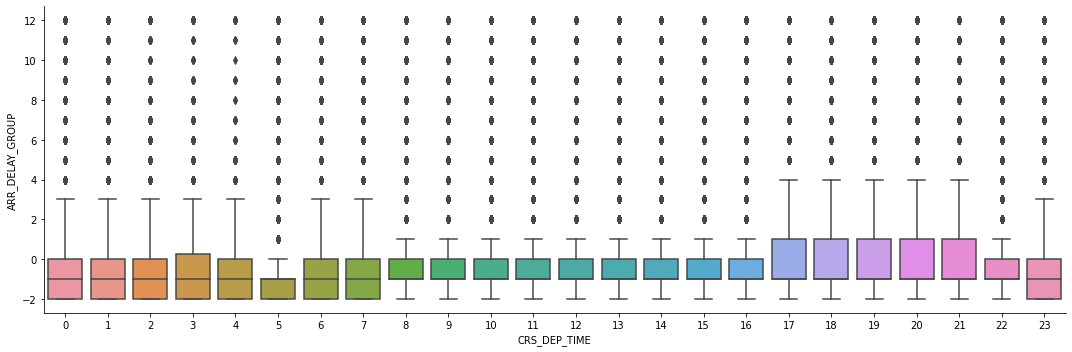

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
flight_data_time = flight_data[['CRS_DEP_TIME','ARR_DELAY_GROUP']]
flight_data_time['CRS_DEP_TIME'] = flight_data_time['CRS_DEP_TIME'].apply(lambda x: np.int32(np.floor(x/100)))
flight_data_time['CRS_DEP_TIME'] = flight_data_time['CRS_DEP_TIME'].apply(lambda x: 0 if x == 24 else x)
plt.figure(figsize=(20,5))
sns.catplot(x="CRS_DEP_TIME", y="ARR_DELAY_GROUP", aspect=3, kind='box', data=flight_data_time)


# Analysis on the Carrier Delay to Arrival Delay - Carrier

The **Carrier** information can capture the carrier specific features that could impact the arrival schedule decision, which is directly related to Carrier Delay. 

<br>We do this because the management efficiency and marketing strategy differ from carrier to carrier. For example, budget airlines have higher probabilities of arrival delay because their customers are price sensitive and are willing to accept delays in exchange for a better deal. 

<br>Nevertheless, being punctual is more essential for some commercial-passenger-oriented carriers, since their goodwill is built highly based on their services and customer satisfaction. 

<br>Thus, Carrier information is a reasonable feature to predict Carrier Delay, which directly affects the arrival delay. The figure below supports such idea that the carrier largely affect the arrival delay.

<Figure size 1440x360 with 0 Axes>

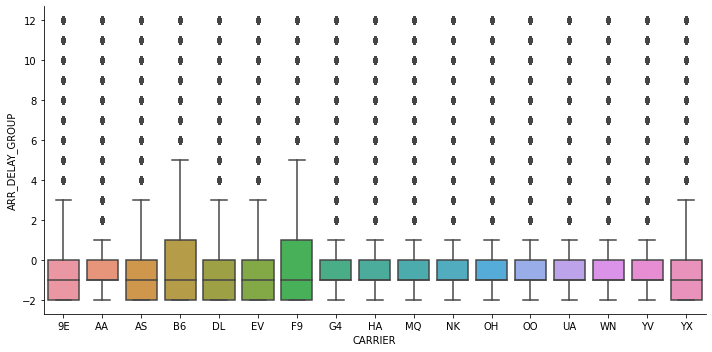

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
flight_data_time = flight_data[['CARRIER','ARR_DELAY_GROUP']]
plt.figure(figsize=(20,5))
sns.catplot(x="CARRIER", y="ARR_DELAY_GROUP", aspect=2, kind='box', data=flight_data_time)
#plt.axhline(0,color='k')

# Analysis on the Origin and Destination to Arrival Delay - Origin State and Destination State

The below two figures represent the relationships between the Origin State and Destination State to the flight arrival delays. The airports themselves are potential drivers for the National Air System Delay and the Security Delay.

<br>Different Origin and Destination airports have different airport capacities, for instance, the airline congestion or the bandwidth of security check are different between different airports. Therefore, introducing Origin and Destination airports in our input features captures the variation in National Air System Delay and Security Delay.

<Figure size 1440x360 with 0 Axes>

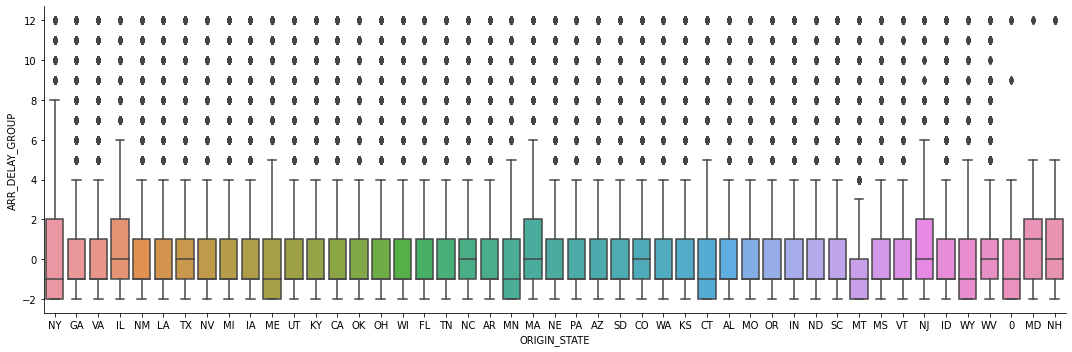

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
flight_data_time = clean_data[['ORIGIN_STATE','ARR_DELAY_GROUP']]
sns.catplot(x="ORIGIN_STATE", y="ARR_DELAY_GROUP", aspect=3, kind='box', data=flight_data_time)
#plt.axhline(0,color='k')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 1440x360 with 0 Axes>

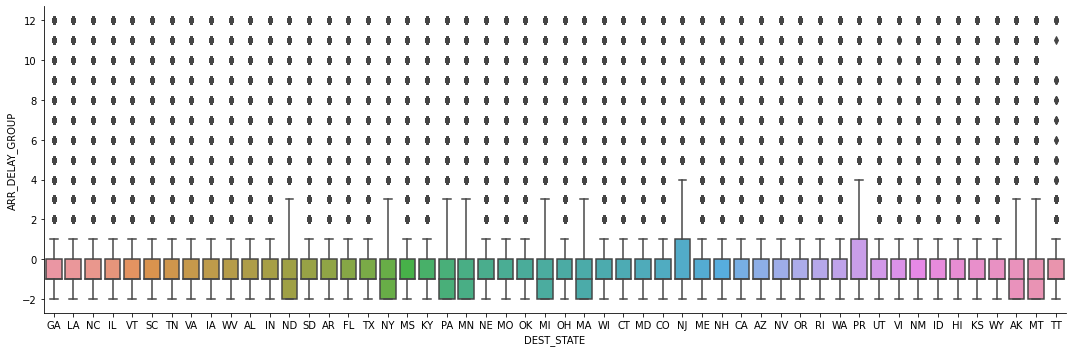

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

flight_data_time = flight_data[['DEST_STATE','ARR_DELAY_GROUP']]
plt.figure(figsize=(20,5))
sns.catplot(x="DEST_STATE", y="ARR_DELAY_GROUP", aspect=3, kind='box', data=flight_data_time)
#plt.axhline(0,color='k')

# Conclusion

With the aid of Data Visualization by seaborn library, we can have a rough picture on the distribution and tendency of prediction to our raw data. By going through these steps, we select **Origin State and Destination State**, **Carrier**, **CRS Departure time**, **Full time equivalent employees (EMPFTE)** as features for our predictors for flight delays.
